# AI Apprentice Lab 1 Solution
#### Exploratory Data Analysis

1. The dataset provided is described below 
2. Use basic Python packages for numeric computing and visualization
3. Obtain useful information regarding the dataset

In [1]:
#  IMPORT REQUIRED LIBRARIES
import pandas
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
#   READ DATA INTO PYTHON
dataRed = pandas.read_csv("Data/winequality-red.csv", delimiter = ";")
dataWhite = pandas.read_csv("Data/winequality-white.csv", delimiter = ";")
dataFull = pandas.concat([dataRed, dataWhite])

## Dataset information
_Citation Request:_
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


In [3]:
#  OBTAIN INFORMATION ABOUT THE DATASET
print("Data structure:\n\n" + str(dataFull.head())+"\n\n")
print("Data types:\n\n" + str(dataFull.dtypes))

Data structure:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

In [4]:
#   OBTAIN VAALUE COUNTS
print("ALCOHOL: \n", dataFull.alcohol.value_counts(),"\n\n",
      "SULPHATES: \n", dataFull.sulphates.value_counts(),"\n\n",
      "DENSITY: \n", dataFull.density.value_counts(),"\n\n",
      "pH: \n", dataFull.pH.value_counts(),"\n\n",
      "QUALITY: \n", dataFull.quality.value_counts(),
     sep='')

ALCOHOL: 
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
9.233333       1
12.333333      1
13.133333      1
11.466667      1
11.550000      1
Name: alcohol, Length: 111, dtype: int64

SULPHATES: 
0.50    276
0.46    243
0.54    235
0.44    232
0.38    214
       ... 
1.59      1
1.20      1
1.34      1
1.26      1
1.09      1
Name: sulphates, Length: 111, dtype: int64

DENSITY: 
0.99720    69
0.99760    69
0.99800    64
0.99200    64
0.99280    63
           ..
0.99631     1
1.00022     1
1.00055     1
0.99065     1
0.99852     1
Name: density, Length: 998, dtype: int64

pH: 
3.16    200
3.14    193
3.22    185
3.20    176
3.15    170
       ... 
2.82      1
2.72      1
2.77      1
3.85      1
3.81      1
Name: pH, Length: 108, dtype: int64

QUALITY: 
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


#### Let's take a closer look at the value distribution of the data
##### Then we will plot the data against important axes like quality, alcohol, pH and others

In [5]:
dataFull.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<ipython-input-6-d867c57e9461>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2,2,i%4+1)


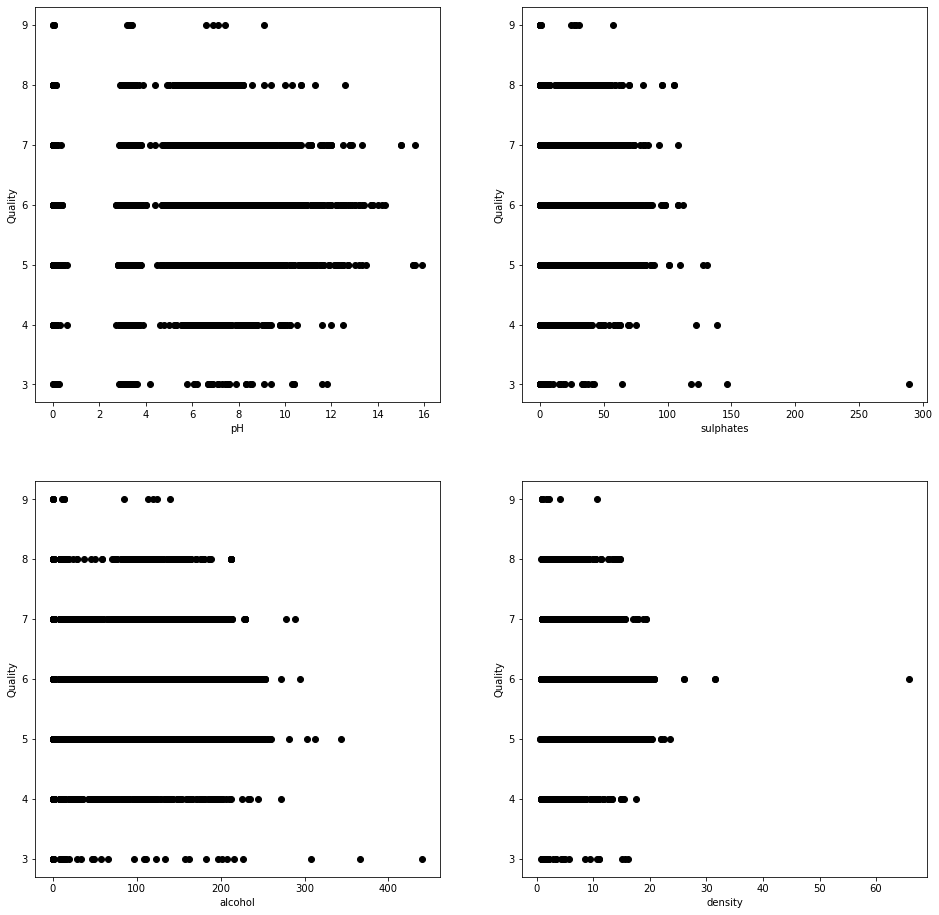

In [6]:
#   COLUMN VISUALIZATION
fig = plt.figure( figsize=(16,16) )
i = 0
for name in dataFull.columns.values:
    if name == "quality":
        break
    ax = fig.add_subplot(2,2,i%4+1)
    ax.set_ylabel("Quality")
    ax.set_xlabel(name)
    ax.scatter(dataFull[name], dataFull["quality"], c=[(0,0,0)])
    i = i +1
plt.show()

###### We can examine the distribution of each column in the data using pandas crosstab

In [7]:
quality = pandas.crosstab(index= dataFull["quality"],columns='count')
alcohol = pandas.crosstab(index= dataFull["alcohol"],columns=dataFull["quality"])
pH = pandas.crosstab(index= dataFull["pH"],columns=dataFull["quality"])
density = pandas.crosstab(index= dataFull["density"],columns=dataFull["quality"])

###### Now let's visualize what we obtained

<Figure size 4608x2304 with 0 Axes>

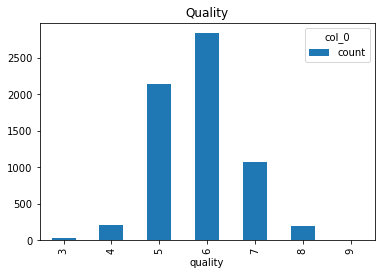

In [8]:
fig = plt.figure(figsize=(64,32))
quality.plot(kind="bar", title ="Quality", stacked=False)
plt.show()

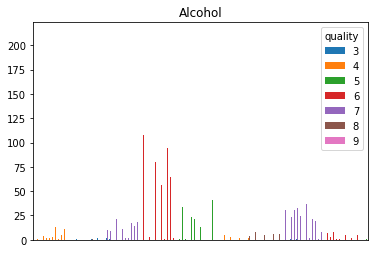

In [9]:
plot = alcohol.plot(kind="bar", title="Alcohol", stacked=False)
plot.axes.xaxis.set_visible(False)
plt.show()

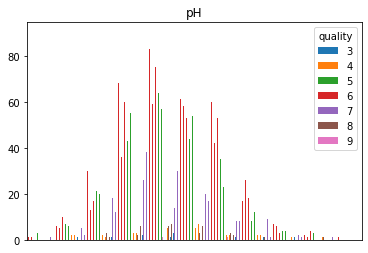

In [10]:
plot = pH.plot(kind="bar",title="pH", stacked=False)
plot.axes.xaxis.set_visible(False)
plt.show()

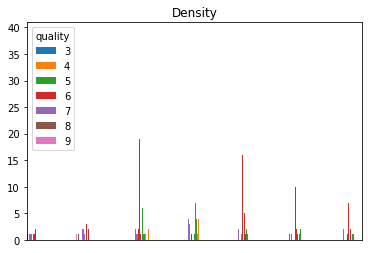

In [11]:
plot = density.plot(kind="bar",title="Density", stacked=False)
plot.axes.xaxis.set_visible(False)
plt.show()

*Created by Nicholas Stepanov: https://github.com/renowator*